In [1]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN_PATH = '../../../input/train_100_events'

In [3]:

event_prefix = 'event000001003'
hits, cells, particles, truth = load_event(os.path.join(TRAIN_PATH, event_prefix))

mem_bytes = (hits.memory_usage(index=True).sum() 
             + cells.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())
print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event000001003 memory usage 15.95 MB


In [4]:
print(hits.head())
print(len(hits))
print(len(hits[hits.layer_id == 2]))
print(len(hits[hits.layer_id == 14]))
print(np.unique(hits.volume_id))

print(particles.head())
print(len(particles))

print(cells.head())
print(len(cells))

print(truth.head())
print(len(truth))

my_volumes = [7,8,9]
part_hits = hits.loc[hits.volume_id.isin(my_volumes)]
print(len(part_hits))


   hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -56.268002 -10.52220 -1502.5          7         2          1
1       2 -70.421097 -10.58280 -1502.5          7         2          1
2       3 -96.056000 -12.50000 -1502.5          7         2          1
3       4 -91.603104  -6.48208 -1502.5          7         2          1
4       5 -59.416000  -8.46282 -1502.5          7         2          1
104451
25615
3866
[ 7  8  9 12 13 14 16 17 18]
        particle_id        vx        vy       vz         px         py  \
0  4503668346847232  0.011518 -0.004729  1.53903 -15.039900 -31.775400   
1  4503805785800704  0.011518 -0.004729  1.53903  39.321999 -93.916901   
2  4504149383184384  0.011518 -0.004729  1.53903   0.892703   3.678410   
3  4504218102661120  0.011518 -0.004729  1.53903   0.806023   2.168050   
4  4504424261091328  0.011518 -0.004729  1.53903  -0.044601   0.089776   

           pz  q  nhits  
0  109.127998  1     14  
1    1.029840 -1     12  
2   

/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[ 7  8  9 12 13 14 16 17 18]


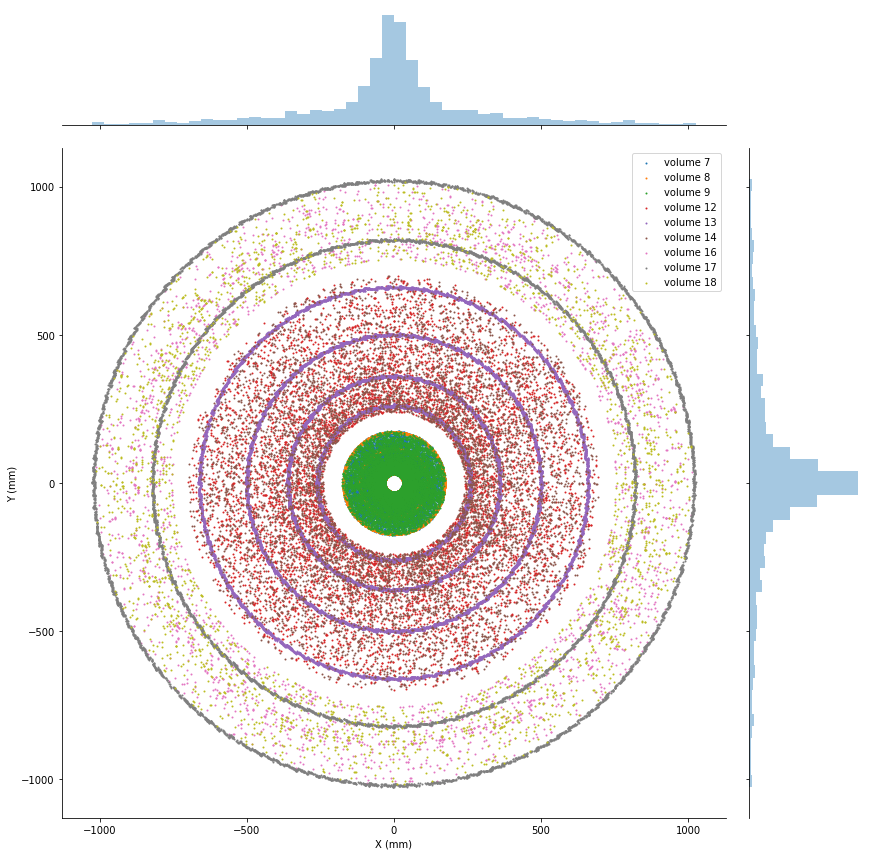

In [5]:
# From the XY plane
g = sns.jointplot(hits.x, hits.y, size=12)

#Clear the axes containing the scatter plot
g.ax_joint.cla()
# Set the current axis to the parent of ax
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
print(hits.volume_id.unique())
for volume in volumes:
    v = hits[hits.volume_id == volume]
    # scattering the hit coordinates with the particle size = 1
    plt.scatter(v.x, v.y, s=1, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


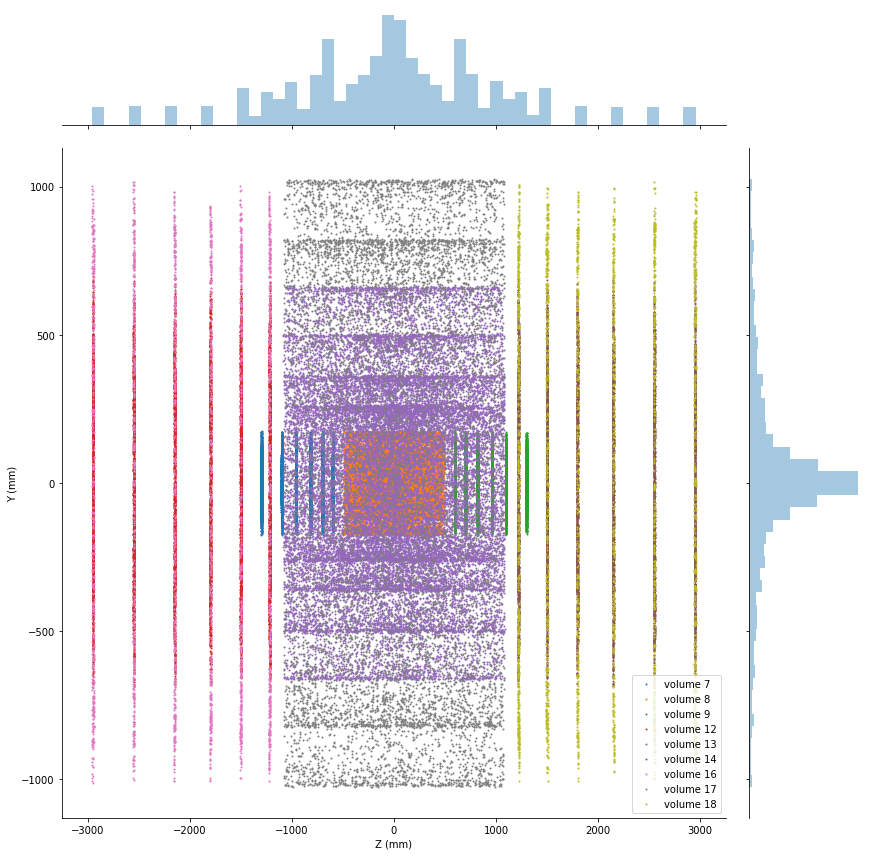

In [6]:
#From the YZ plane
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=1, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

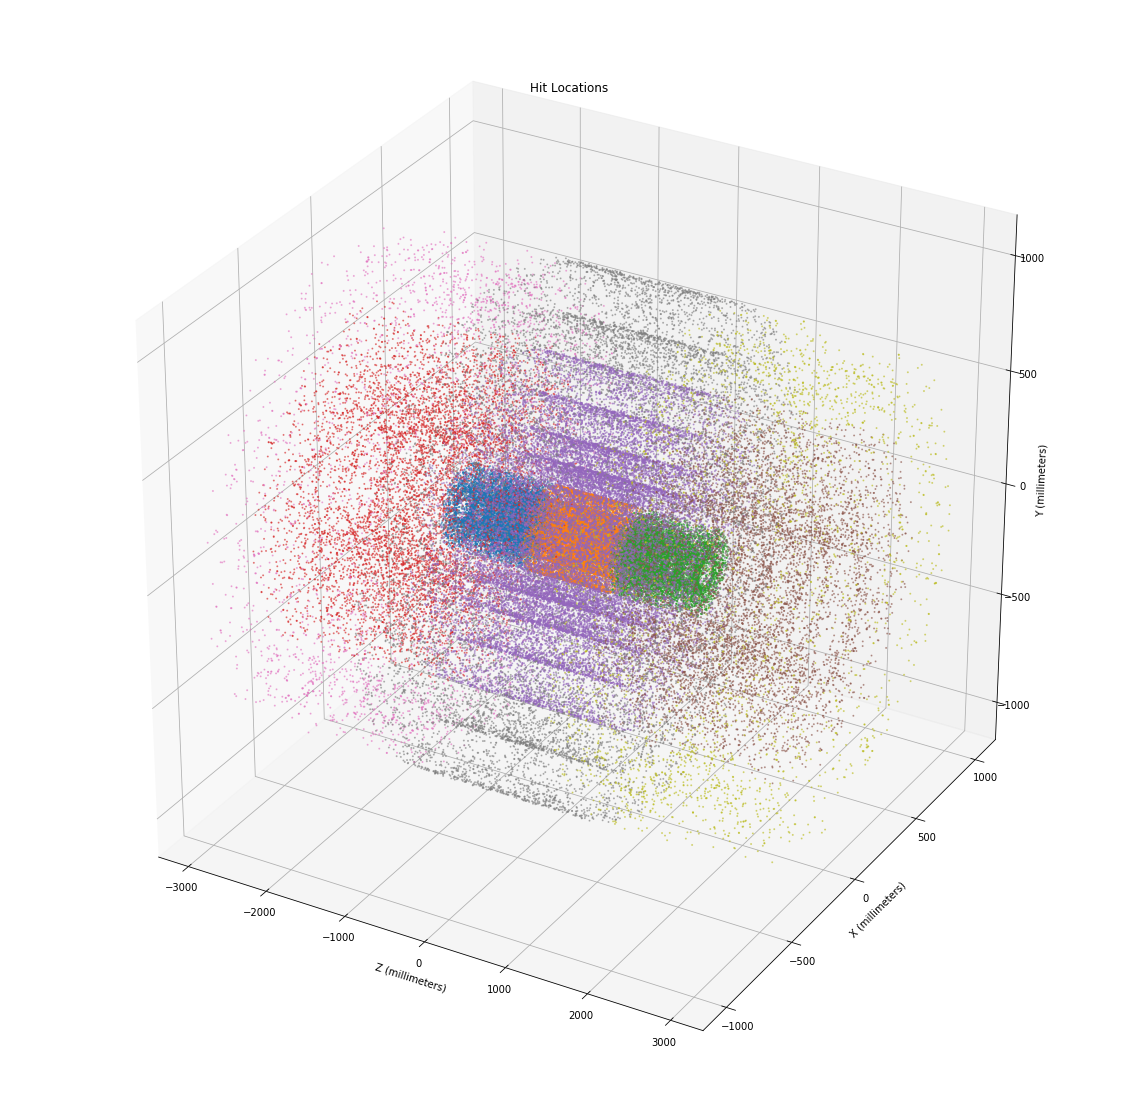

In [7]:
# From XYZ 3D perspective
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()


/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


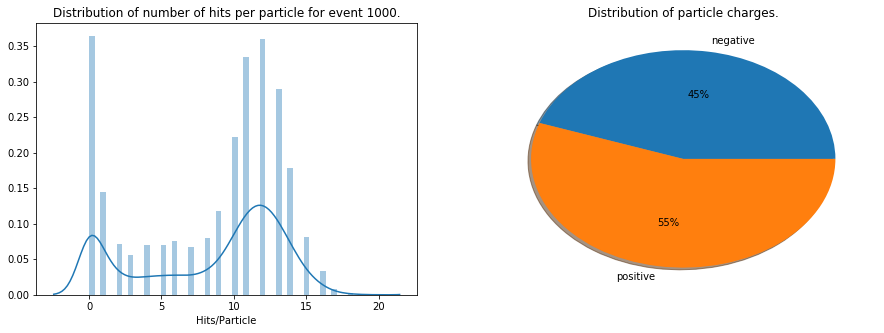

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(particles.nhits.values, axlabel='Hits/Particle', bins=50)
plt.title('Distribution of number of hits per particle for event 1000.')
plt.subplot(1, 2, 2)
plt.pie(particles.groupby('q')['vx'].count(),
        labels=['negative', 'positive'],
        autopct='%.0f%%',
        shadow=True,
        radius=1)
plt.title('Distribution of particle charges.')
plt.show()


/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


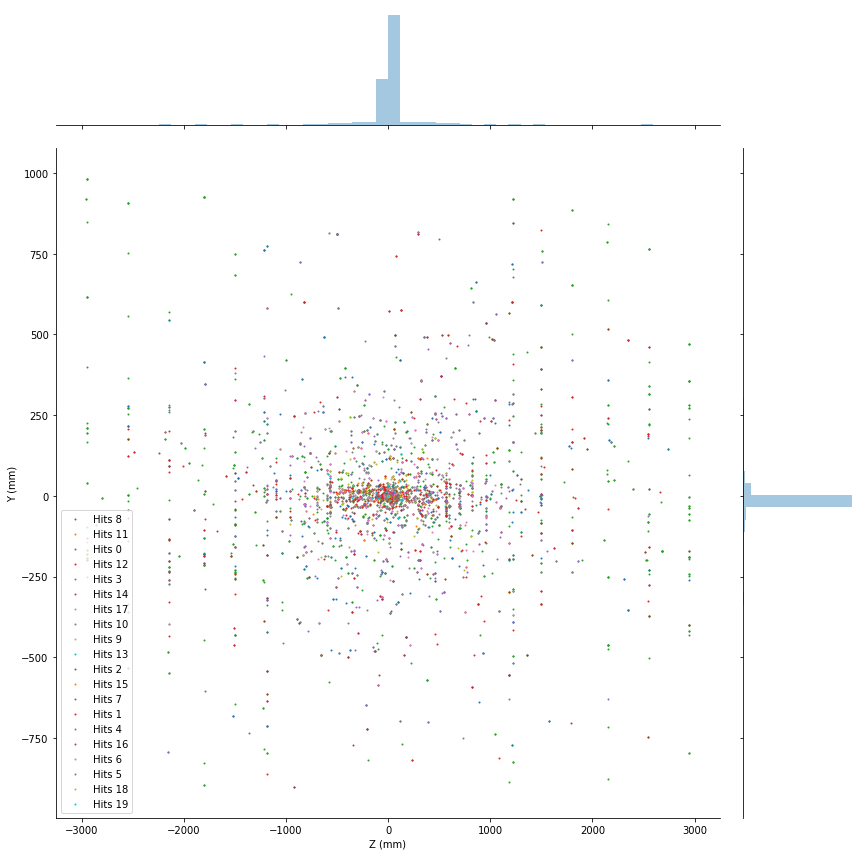

In [9]:
# Visualize the original particles of tracks, most particle collisions are generated from the origin

g = sns.jointplot(particles.vz, particles.vy,  s=3, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

n_hits = particles.nhits.unique()
for n_hit in n_hits:
    p = particles[particles.nhits == n_hit]
    plt.scatter(p.vz, p.vy, s=1, label='Hits {}'.format(n_hit))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

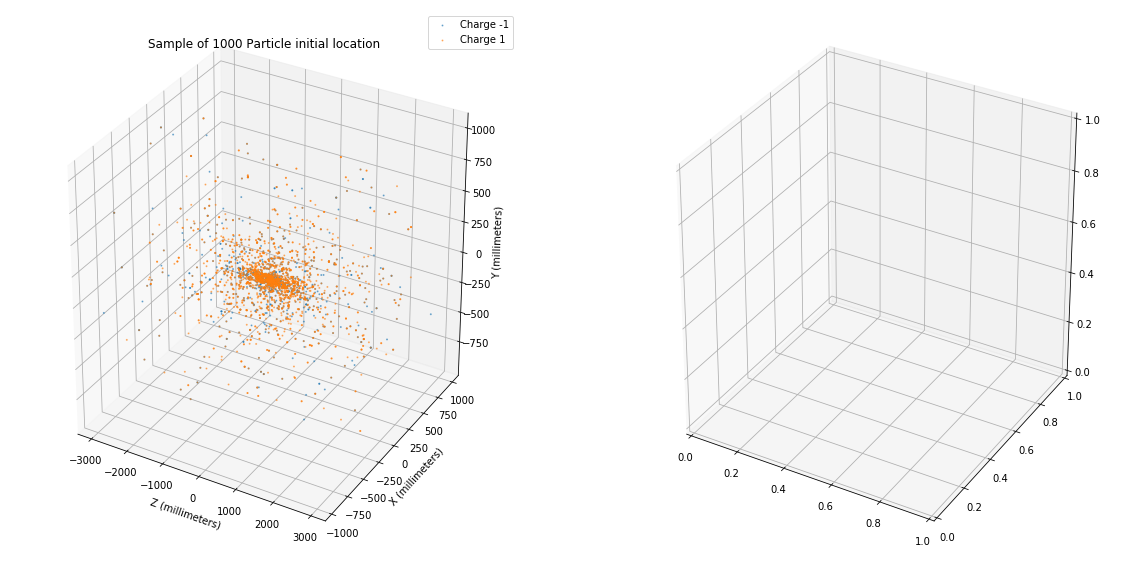

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(122, projection='3d')
ax = fig.add_subplot(121, projection='3d')

for charge in [-1, 1]:
    q = particles[particles.q == charge]
    ax.scatter(q.vz, q.vx, q.vy, s=1, label='Charge {}'.format(charge), alpha=0.5)
ax.set_title('Sample of 1000 Particle initial location')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.legend()
plt.show()

In [5]:
truth = truth.merge(hits, on=['hit_id'], how='left')


particles:1117
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[-4.19292021]
[3.81617999]
[3.81617999]
[3.81617999]
[3.81617999]
[9.72665024]
[-5.58585978]
[-5.58585978]
[-5.58585978]
[-5.58585978]
[-5.58585978]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-3.89978004]
[-4.80197001]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-1.85532999]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[-10.07689953]
[6.42874002]
[6.42874

No handles with labels found to put in legend.


292 tracks out of 1117 start  from > 0,0,1
Hits counts: 13
0 out of 1117 tracks are not passed in volume 7 8 9
0.0% of the tracks are not passed in volume 7 8 9


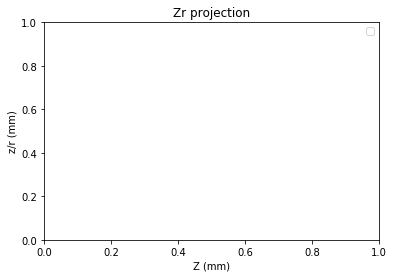

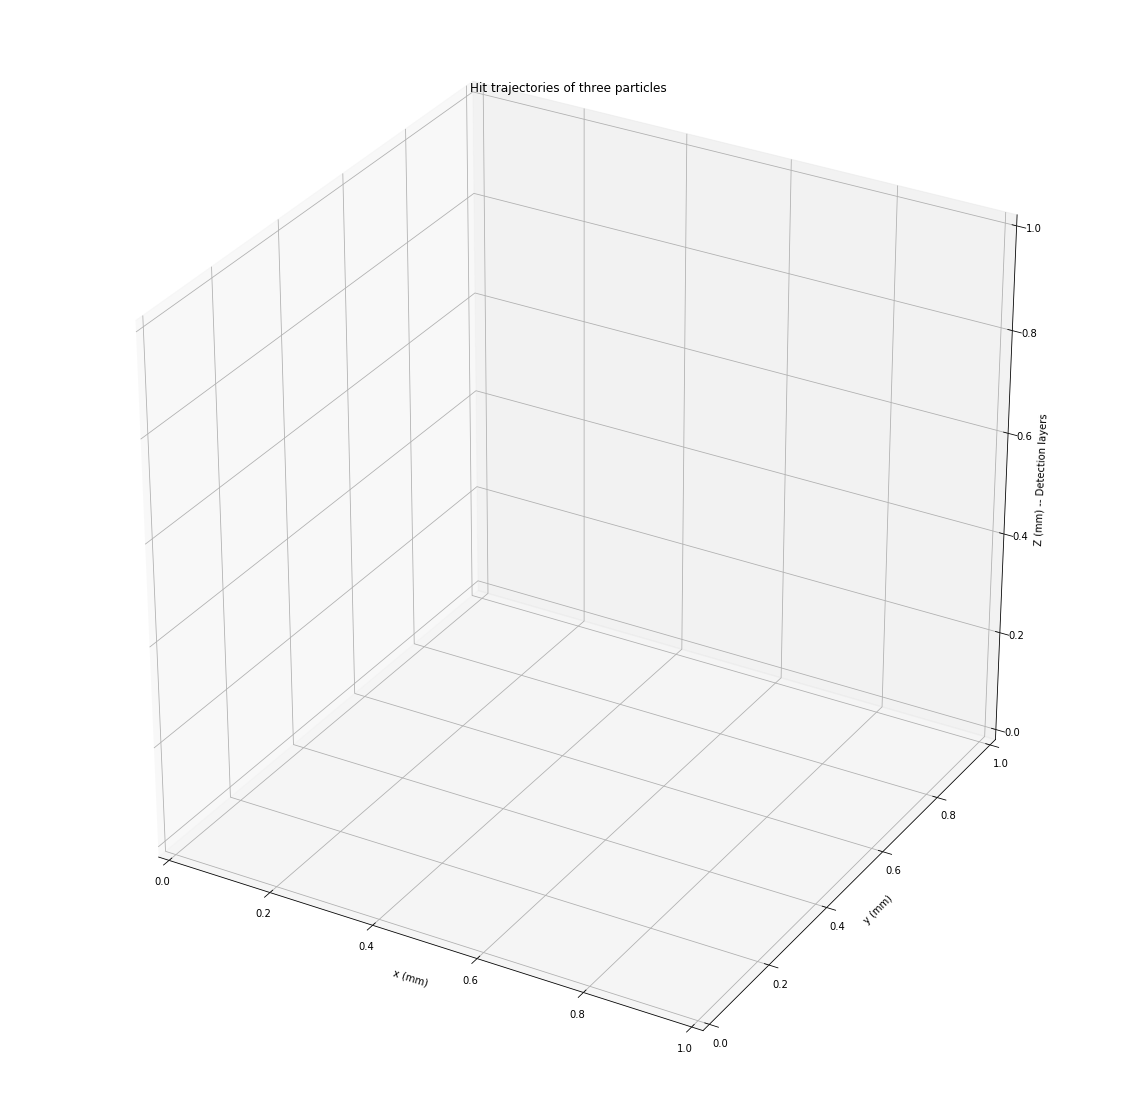

In [141]:

def get_track_not_origin(hit_count):
    particle_list = []
    p_traj_list = []

    for i in range(len(particles.loc[particles.nhits == hit_count])):
            particle_list.append(particles.loc[particles.nhits == hit_count].iloc[i])


    print('particles:' + str(len(particle_list)))
    counter = 0
    for i in range(len(particle_list)):
        
        single_track = (truth[truth.particle_id == particle_list[i].particle_id][['particle_id','tx', 'ty', 'tz', 'volume_id', 'layer_id', 'module_id', 'weight']])
        single_track.append({'tx': particle_list[i].vx, 'ty': particle_list[i].vy, 'tz': particle_list[i].vz}, ignore_index=True).sort_values(by='tz')
        if np.absolute(particle_list[i].vx) < 0.01 and np.absolute(particle_list[i].vy) < 0.01 and np.absolute(particle_list[i].vz) > 1 :
            print(np.unique(particle_list[i].vz))
           
            counter = counter+1
        p_traj_list.append(single_track)
        
    print(str(counter) + ' tracks out of '  + str(len(p_traj_list)) + ' start  from > 0,0,1')
    #true false
    p_traj_list2 = []

    for i in range(len(p_traj_list)):
        count = 0
        for _, row in p_traj_list[i].iterrows():
            count = count+1
            if row.volume_id in ([7,8,9]):                
                break
            else:
                if count == hit_count-1:
                    p_traj_list2.append(p_traj_list[i])
                    break

    print('Hits counts: ' + str(hit_count))
    print(str(len(p_traj_list2)) + ' out of ' + str(len(p_traj_list)) + ' tracks are not passed in volume 7 8 9' )
    print(str(len(p_traj_list2)/len(p_traj_list))+ '% of the tracks are not passed in volume 7 8 9' )

    
    for i in range(len(p_traj_list2)):
        plt.plot(p_traj_list2[i].tx, p_traj_list2[i].tz,'-o')
        
   
    plt.xlabel('Z (mm)')
    plt.ylabel('z/r (mm)')
    plt.title('Zr projection')
    plt.legend()
    plt.show()



    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
        
    for i in range(len(p_traj_list2)):
            ax.plot(
                xs=p_traj_list2[i].tx,
                ys=p_traj_list2[i].ty,
                zs=p_traj_list2[i].tz, marker='o')

    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('Z (mm) -- Detection layers')
    plt.title('Hit trajectories of three particles')
    plt.show()
    

for i in range(13,14):
    get_track_not_origin(i)


        particle_id        vx        vy       vz        px        py       pz  \
6  4504561700044800  0.011518 -0.004729  1.53903  0.161681  0.887995  2.02003   

   q  nhits  
6  1      7  
            particle_id          tx         ty           tz  volume_id  \
20512  4508203832311808   31.805500  -3.186700   133.533997          8   
27810  4508203832311808   71.324501  -5.120850   296.759003          8   
34048  4508203832311808  115.362000  -4.766550   477.933990          8   
40724  4508203832311808  144.427994  -3.046310   598.000000          9   
43255  4508203832311808  168.550995  -0.670781   698.000000          9   
43298  4508203832311808  169.516998  -0.562941   702.000000          9   
66600  4508203832311808  260.286987  14.828800  1080.739990         13   
83794  4508203832311808  291.877014  22.751101  1215.500000         14   

       layer_id  module_id  
20512         2        136  
27810         4        368  
34048         6        702  
40724         2         54

/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in arccos
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in arccos
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in arccos


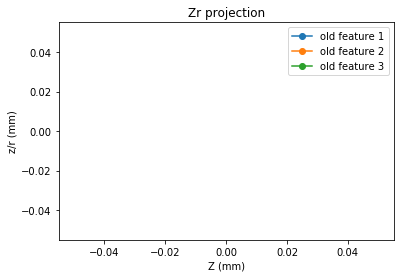

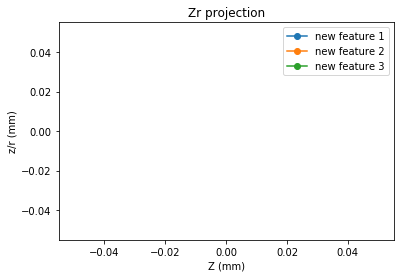

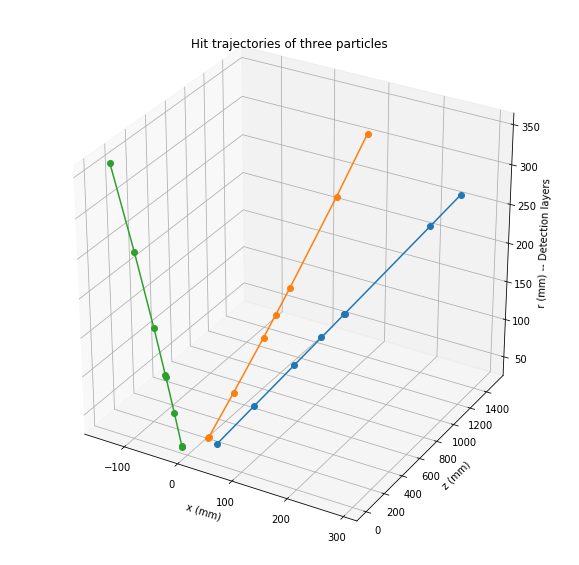

In [110]:
HIT_COUNT = 8
particle1 = particles.loc[particles.nhits == HIT_COUNT].iloc[0]
particle2 = particles.loc[particles.nhits == HIT_COUNT].iloc[1]
particle3 = particles.loc[particles.nhits == HIT_COUNT].iloc[2]

#print(truth.loc[truth.particle_id == 4504561700044800])
print(particles.loc[particles.particle_id == 4504561700044800])

cond = np.where(truth.volume_id.notnull())

truth = truth.loc[cond]


p_traj_surface1 = truth[truth.particle_id == particle1.particle_id][['particle_id','tx', 'ty', 'tz', 'volume_id', 'layer_id', 'module_id']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['particle_id','tx', 'ty', 'tz',  'volume_id', 'layer_id', 'module_id']]
p_traj_surface3 = truth[truth.particle_id == particle3.particle_id][['particle_id','tx', 'ty', 'tz',  'volume_id', 'layer_id', 'module_id']]


p_traj1 = p_traj_surface1
p_traj2 = p_traj_surface2
p_traj3 = p_traj_surface3


print (p_traj1)
# p_traj1 = (p_traj_surface1
#           .append({'tx': particle1.vx, 'ty': particle1.vy, 'tz': particle1.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# p_traj2 = (p_traj_surface2
#           .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# p_traj3 = (p_traj_surface3
#           .append({'tx': particle3.vx, 'ty': particle3.vy, 'tz': particle3.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# Visualize XY projection to the Z-axis

r1 = np.sqrt(p_traj1.tx**2 + p_traj1.ty**2)
phi1 = np.arctan2(p_traj1.ty, p_traj1.tx)
d1 =  np.sqrt(p_traj1.tx**2 + p_traj1.ty**2 + p_traj1.tz**2)

r2 = np.sqrt(p_traj2.tx**2 + p_traj2.ty**2)
phi2 = np.arctan2(p_traj2.ty, p_traj2.tx)
d2 =  np.sqrt(p_traj2.tx**2 + p_traj2.ty**2 + p_traj2.tz**2)


r3 = np.sqrt(p_traj3.tx**2 + p_traj3.ty**2)
phi3 = np.arctan2(p_traj3.ty, p_traj3.tx)
d3 =  np.sqrt(p_traj3.tx**2 + p_traj3.ty**2 + p_traj3.tz**2)



# plt.plot(r1, phi1, '-o', label='1')
# plt.plot(r2, phi2, '-o', label='2')
# plt.plot(r3, phi3, '-o', label='3')
# plt.xlabel('r (mm)')
# plt.ylabel('phi ')
# plt.title('r-phi ')





# rr1 = r1/1000
# rr2 = r2/1000
# rr3 = r3/1000

# dz=0.01

# ii = 240
# z1 = np.sin(phi1 + (rr1 + 0.03*rr1**2)*ii/180*np.pi*(dz*p_traj1.tz))
# z2 = np.sin(phi2 + (rr2 + 0.03*rr2**2)*ii/180*np.pi*(dz*p_traj2.tz))
# z3 = np.sin(phi3 + (rr3 + 0.03*rr3**2)*ii/180*np.pi*(dz*p_traj3.tz))

# print('with dZ')
# print(z1, z2, z3)

# z1 = np.sin(phi1 + (rr1 + 0.03*rr1**2)*ii/180*np.pi)
# z2 = np.sin(phi2 + (rr2 + 0.03*rr2**2)*ii/180*np.pi)
# z3 = np.sin(phi3 + (rr3 + 0.03*rr3**2)*ii/180*np.pi)


# print('without dZ')
# print(z1, z2, z3)

# z1 = np.sin(phi1 )
# z2 = np.sin(phi2 )
# z3 = np.sin(phi3 )


# plt.plot(p_traj1.tz, p_traj1.ty, '-o', label='hits')
# plt.plot(p_traj2.tz, p_traj2.ty, '-o', label='hits')
# plt.plot(p_traj3.tz, p_traj3.ty, '-o', label='hits')

# z1 feature
z1 = (p_traj1.tz+r1)/r1
z2 = (p_traj2.tz+r2)/r2
z3 = (p_traj3.tz+r3)/r3

# z2 feature
# z1 = (p_traj1.tz+r1)/d1
# z2 = (p_traj2.tz+r2)/d2
# z3 = (p_traj3.tz+r3)/d3


# z3 feature
# z1 = np.log1p(np.absolute(p_traj1.tz/r1))*np.sign(p_traj1.tz)
# z2 = np.log1p(np.absolute(p_traj2.tz/r2))*np.sign(p_traj2.tz)
# z3 = np.log1p(np.absolute(p_traj3.tz/r3))*np.sign(p_traj3.tz)



# z4 feature
z1 = np.arccos(p_traj1.tz+10/d1)
z2 = np.arccos(p_traj2.tz+10/d2)
z3 = np.arccos(p_traj3.tz+10/d3)


# plt.plot(p_traj1.tz, r1,'-o', label='1')
# plt.plot(p_traj2.tz, r2,'-o', label='2')
# plt.plot(p_traj3.tz, r3,'-o', label='3')
# plt.xlabel('Z (mm)')
# plt.ylabel('r ')
# plt.title('Zr projection')
# plt.legend()
# plt.show()


# plt.plot(p_traj1.tz+r1, r1,'-o', label='new 1')
# plt.plot(p_traj2.tz+r2, r2,'-o', label='new 2')
# plt.plot(p_traj3.tz+r3, r3,'-o', label='new 3')
# plt.xlabel('Z (mm)')
# plt.ylabel('r (mm)')
# plt.title('Zr projection')
# plt.legend()
# plt.show()


plt.plot(p_traj1.tz, z1,'-o', label='old feature 1')
plt.plot(p_traj2.tz, z2,'-o', label='old feature 2')
plt.plot(p_traj3.tz, z3,'-o', label='old feature 3')


plt.xlabel('Z (mm)')
plt.ylabel('z/r (mm)')
plt.title('Zr projection')



plt.legend()
plt.show()




# z1 = np.log1p(np.absolute((p_traj1.tz+r1)/r1))*np.sign(p_traj1.tz+r1)
# z2 = np.log1p(np.absolute((p_traj2.tz+r2)/r2))*np.sign(p_traj2.tz+r2)
# z3 = np.log1p(np.absolute((p_traj3.tz+r3)/r3))*np.sign(p_traj3.tz+r3)


plt.plot(p_traj1.tz+r1, z1,'-o', label='new feature 1')
plt.plot(p_traj2.tz+r2, z2,'-o', label='new feature 2')
plt.plot(p_traj3.tz+r3, z3,'-o', label='new feature 3')


plt.xlabel('Z (mm)')
plt.ylabel('z/r (mm)')
plt.title('Zr projection')



plt.legend()
plt.show()



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# ax.plot(
#     xs=p_traj1.tx,
#     ys=p_traj1.ty,
#     zs=p_traj1.tz, marker='o')
# ax.plot(
#     xs=p_traj2.tx,
#     ys=p_traj2.ty,
#     zs=p_traj2.tz, marker='o')
# ax.plot(
#     xs=p_traj3.tx,
#     ys=p_traj3.ty,
#     zs=p_traj3.tz, marker='o')

ax.plot(
    xs=p_traj1.tx,
    ys=p_traj1.tz,
    zs=r1, marker='o')
ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.tz,
    zs=r2, marker='o')
ax.plot(
    xs=p_traj3.tx,
    ys=p_traj3.tz,
    zs=r3, marker='o')


# ax.plot(
#     xs=r1,
#     ys=phi1,
#     zs=p_traj1.tz, marker='o')
# ax.plot(
#     xs=r2,
#     ys=phi2,
#     zs=p_traj2.tz, marker='o')
# ax.plot(
#     xs=r3,
#     ys=phi3,
#     zs=p_traj3.tz, marker='o')




ax.set_xlabel('x (mm)')
ax.set_ylabel('z (mm)')
ax.set_zlabel('r (mm) -- Detection layers')
plt.title('Hit trajectories of three particles')
plt.show()